# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs
from sklearn import metrics

# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer

from keras.applications.vgg16 import VGG16
# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#loading data into a pandas dataframe
path="/content/drive/MyDrive/Great_Learning/files/Computer Vision/project_5/Labels.csv"
Labels_df=pd.read_csv(path)

In [ ]:
# Load the image dataset (assuming it is a NumPy array)
image_path = '/content/drive/MyDrive/Great_Learning/files/Computer Vision/project_5/images.npy'  # adjust the path as needed
images = np.load(image_path)

## Data Overview

### Understand the shape of the dataset

In [ ]:
print(images.shape)


(4750, 128, 128, 3)


In [ ]:
print(Labels_df.shape)

(4750, 1)


In [ ]:
# Displaying the shapes of the loaded datasets to verify the data
print("Shape of Labels DataFrame:", Labels_df.shape)

Shape of Labels DataFrame: (4750, 1)


In [ ]:
print("Shape of Images Array:", images.shape)

Shape of Images Array: (4750, 128, 128, 3)


### **Observations:**

There are 4750 RGB images of shape 128 x 128 X 3, each image having 3 channels.

# Plotting images using OpenCV and matplotlib

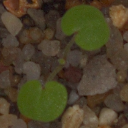

In [ ]:
cv2_imshow(images[5])

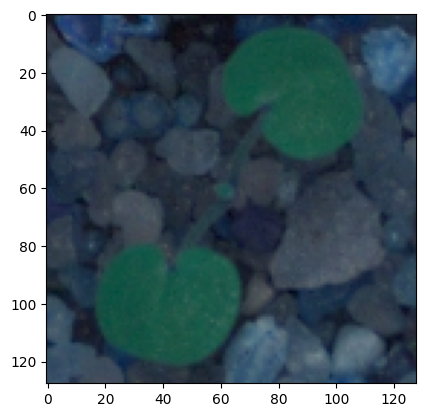

In [ ]:
plt.imshow(images[5])

###**Observations:**

**OpenCV cv2.imshow:**

*   Displays the image in its default BGR format (colors may look incorrect as OpenCV does not convert BGR to RGB).

*   Image appears smaller and uses a pop-up window.

**Matplotlib plt.imshow:**

*  Displays the image correctly in RGB format.

*  The image appears larger and integrates well within Jupyter Notebook.

*  It shows axis scales, which are customizable.

# Convert the BGR images to RGB images.

In [ ]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

###   **BGR to RGB Conversion Observations:**

**Why Conversion is Needed:**

*   OpenCV loads images in BGR format by default.

*  Most deep learning frameworks (like TensorFlow, PyTorch) and visualization libraries (like Matplotlib) use the RGB format.

**Code Explanation:**

*   cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB) converts each image from BGR to RGB.

*  A loop is applied to process all images in the dataset.

**Impact:**

*  Ensures proper color representation for visualization and training.

*  Prevents color channel mismatch issues during training.

**Efficiency:**

*  Looping through the dataset works, but for larger datasets, consider vectorized operations or optimizations for speed.

# Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

In [ ]:
def plot_images(images, labels_df):
    """
    Plot random images with their corresponding labels.

    Parameters:
    - images: NumPy array of images (assumed shape: (num_images, height, width, channels)).
    - labels_df: Pandas DataFrame containing the labels with 'Label' as the column name.
    """
    rows = 3   # Number of rows
    cols = 4   # Number of columns
    fig = plt.figure(figsize=(10, 8))  # Figure size

    for i in range(rows * cols):
        random_index = np.random.randint(0, len(labels_df))  # Random index
        ax = fig.add_subplot(rows, cols, i + 1)  # Add subplot
        ax.imshow(images[random_index])  # Plot the image

        # Set the title as the corresponding label
        ax.set_title(labels_df['Label'].iloc[random_index])

    plt.tight_layout()
    plt.show()

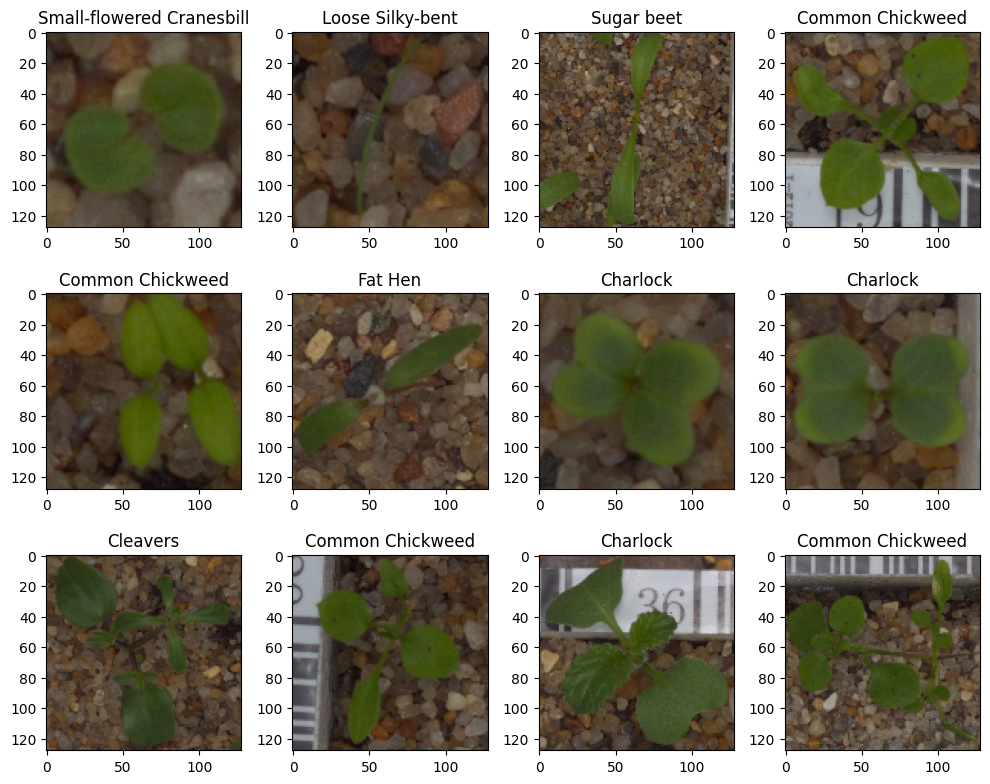

In [ ]:
plot_images(images,Labels_df)

## 1. How are these different category plant images different from each other?

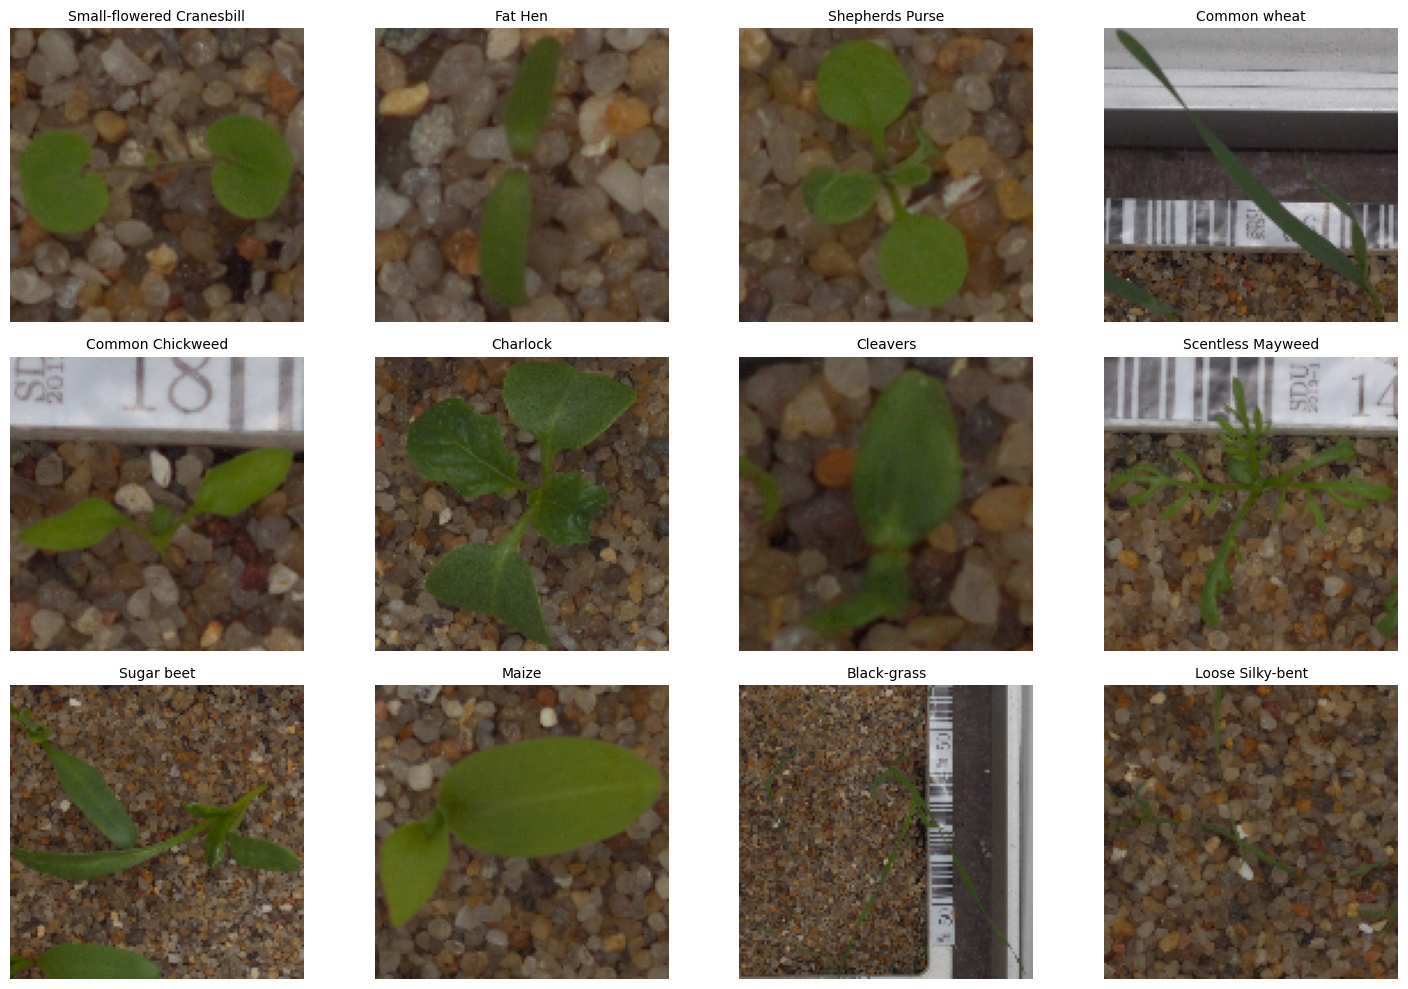

In [ ]:
def plot_category_representatives(images, labels_df):
    """
    Plot one representative image for each category.

    Parameters:
    - images: NumPy array of images (assumed shape: (num_images, height, width, channels)).
    - labels_df: Pandas DataFrame containing the labels with 'Label' as the column name.
    """
    categories = labels_df['Label'].unique()  # Get unique categories
    fig = plt.figure(figsize=(15, 10))  # Define figure size

    for i, category in enumerate(categories):
        # Find the first image index corresponding to this category
        category_indices = labels_df[labels_df['Label'] == category].index
        representative_index = category_indices[0]

        # Add subplot for this category
        ax = fig.add_subplot(3, 4, i + 1)
        ax.imshow(images[representative_index])  # Plot the representative image
        ax.set_title(category, fontsize=10)  # Set the title as the category name
        ax.axis('off')  # Hide the axis for cleaner visualization

    plt.tight_layout()
    plt.show()

# Example usage
plot_category_representatives(images, Labels_df)

### **Observations on Category Differences in Plant Images:**

**Visual Diversity:**

*  Each plant category shows clear visual differences in shape, size, and
orientation of leaves. For example:

*  **"Fat Hen"**: Features small, upright leaves.

*  **"Loose Silky-bent":** Thin and grass-like structure.

*  **"Shepherds Purse":** Rounded, broader leaves.

**Color Differences:**

*  **Most plants have green leaves, but the intensity of green varies:**

*  Categories like "Common Chickweed" and "Cleavers" show a darker green.

*  "Common wheat" and "Loose Silky-bent" have slightly paler green tones.

**Leaf Shape and Texture:**

**Categories differ in the leaf texture:**

*  **"Charlock":** Broad leaves with noticeable structure.

*  **"Black-grass":** Very thin, elongated leaves resembling blades of grass.

*  **"Sugar beet":** Large leaves with prominent veins.

**Surrounding Features:**

*  The background (soil, pebbles, and scale markers) is consistent across all images, which helps focus on the plants.

**Category Representation:**

*  The plot is well-structured to showcase one representative image per category, making it easy to identify distinct visual characteristics of each plant.

**Practical Insights:**

*  Leaf size, orientation, and texture are the key differentiators between plant types.

*  Categories like "Loose Silky-bent" and "Black-grass" may be harder to differentiate due to their similar thin leaf shapes.

## Checking for data imbalance

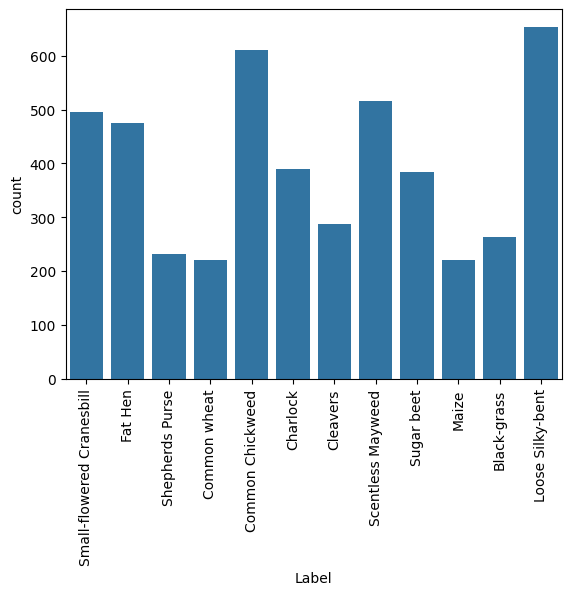

In [ ]:
sns.countplot(x=Labels_df['Label'])  # Checking for data imbalance
plt.xticks(rotation='vertical')  # Rotating the x-axis labels for better visibility
plt.show()

(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(700.0, 0, '700')])

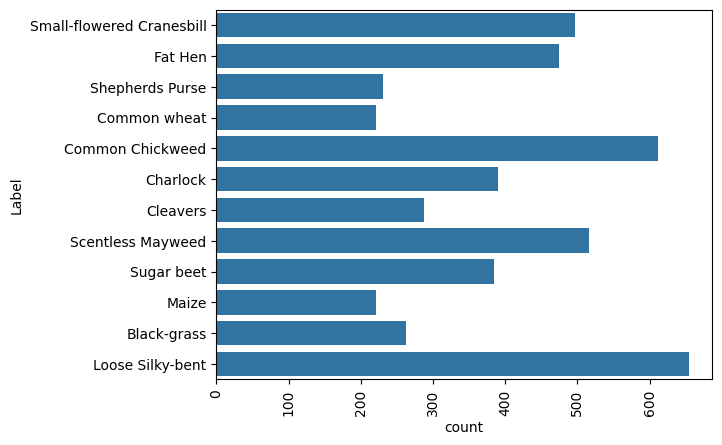

In [ ]:
 sns.countplot(Labels_df['Label'])
 plt.xticks(rotation='vertical')

### **Observations on Data Imbalance**

**Based on the countplot of the Label column:**

**Class Imbalance Exists:**

*   Some classes, such as "Loose Silky-bent", have significantly higher counts (over 600) compared to others.

*    Classes like "Shepherds Purse", "Cleavers", and "Black-grass" have much fewer samples, indicating underrepresentation.

**Major Class:**

*   The "Loose Silky-bent" class dominates the dataset with the highest count, which might bias the model toward predicting this class more frequently.

**Minor Classes:**

*   Classes such as "Shepherds Purse", "Cleavers", and "Maize" have low sample counts (around 200-300). These classes may struggle to generalize during training.

**Balanced Classes:**

*   Some classes, like "Scentless Mayweed", "Fat Hen", and "Small-flowered Cranesbill", are moderately represented with counts around 400-500.

**Risk of Model Bias:**

*   Due to the imbalance, the model might favor predicting the overrepresented classes (e.g., "Loose Silky-bent"), while it may underperform on the underrepresented ones.

## 2.  Is the dataset provided an imbalance? (Check with using bar plots)?

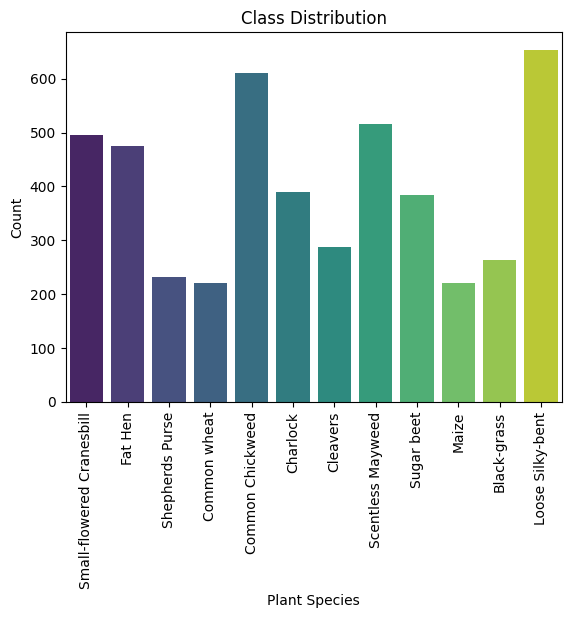

In [ ]:
# Count plot to check for data imbalance
sns.countplot(x=Labels_df['Label'], palette='viridis')  # Use 'Label' column
plt.title('Class Distribution')
plt.xlabel('Plant Species')
plt.ylabel('Count')
plt.xticks(rotation='vertical')  # Rotate labels for better visibility
plt.show()

### **Observations:**

**Imbalance Exists:**

* The dataset has an imbalance in class distribution.

**Majority Class:**

*   'Loose Silky-bent' has the highest count.

**Minority Classes:**

*  Classes like 'Maize' and 'Shepherd's Purse' have significantly lower counts compared to others.

**Distribution Varies:**

*  Counts are unevenly spread across different plant species.

## Data Pre-Processing

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [ ]:
images_decreased = []
height = 64  # Define the height as 64
width = 64   # Define the width as 64
dimensions = (width, height)

for i in range(len(images)):
    images_decreased.append(cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))  # Resize each image

##Image before resizing

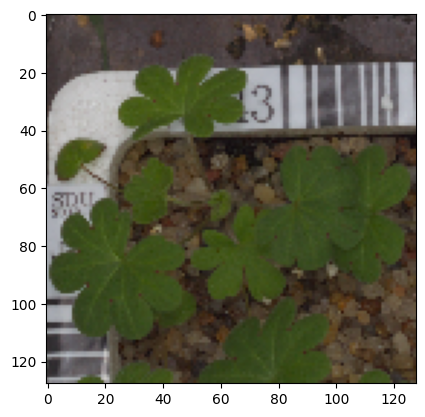

In [ ]:
plt.imshow(images[3])

###Image after resizing

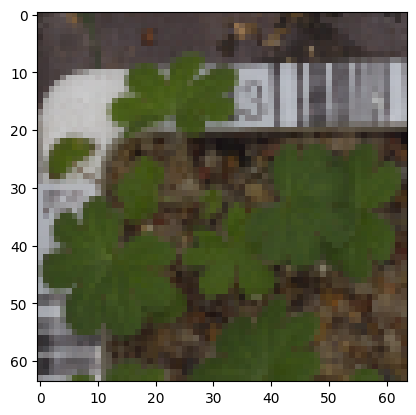

In [ ]:
plt.imshow(images_decreased[3])

### **Observations:**

**Before Resizing:**

*  The original image has a higher resolution and retains more detail.

**After Resizing:**

*  The image dimensions are reduced to 64x64 pixels.

*   The resized image appears blurred and pixelated due to loss of resolution.

## Visualizing images using Gaussian Blur

In [ ]:
# Applying Gaussian Blur to denoise the images
images_gb = []  # List to store images after Gaussian blur

for i in range(len(images)):
    # Apply Gaussian blur with kernel size (3,3) and sigmaX = 0 (auto-calculated)
    images_gb.append(cv2.GaussianBlur(images[i], ksize=(3, 3), sigmaX=0))

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [ ]:
Labels = Labels_df['Label'].values

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased), Labels, test_size=0.1, random_state=42, stratify=Labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42, stratify=y_temp)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 64, 64, 3) (3847,)
(428, 64, 64, 3) (428,)
(475, 64, 64, 3) (475,)


### **Observations on Dataset Splitting:**

**Dataset Size and Splits:**

*  The data has been split into training (80.1%), validation (9%), and test (10%) subsets. This ratio is appropriate for image classification tasks, where:

*  The training set is large enough for model learning.
*  The validation set is sufficient for hyperparameter tuning.
*  The test set is representative for final evaluation.

**Stratified Sampling:**

*  Stratification ensures that the class distribution in the train, validation, and test sets is preserved. This is important for balanced learning across all categories and prevents any bias toward specific classes.

**Data Shapes:**

*  Each image has dimensions (64, 64, 3), indicating they are resized RGB images.

*  **Training set:** 3847 images.

*  **Validation set:** 428 images.

*  **Test set:** 475 images.

**Validation Set Proportion:**

*  The validation set size of 428 images (~10% of training data) is appropriate for tuning hyperparameters and monitoring overfitting.

**Test Set Size:**

*  A test set of 475 images (~10% of total data) ensures reliable performance evaluation on unseen data.


### Encode the target labels

In [ ]:
# Initialize LabelBinarizer
enc = LabelBinarizer()

# Fit and transform y_train, transform y_val and y_test
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded = enc.transform(y_val)
y_test_encoded = enc.transform(y_test)

# Check the shape of the encoded labels
print(y_train_encoded.shape, y_val_encoded.shape, y_test_encoded.shape)

(3847, 12) (428, 12) (475, 12)


### **Observations on Encoding Labels:**

**Label Encoding:**

*  The LabelBinarizer transforms the target labels into one-hot encoded format, suitable for multi-class classification tasks.

**Consistency:**

*  fit_transform on y_train ensures that the label encoding is learned from the training set.
* transform on y_val and y_test ensures consistency in label encoding across all datasets.

**Shapes:**

*  The output shapes (e.g., (3847, num_classes), (428, num_classes), (475, num_classes)) confirm that labels have been encoded into a 2D one-hot format.

**Readiness:**

*  The data is now ready for use with classification models like neural networks or other algorithms requiring categorical outputs.

### Data Normalization

In [ ]:
X_train_normalized = X_train.astype('float32') / 255.0
X_val_normalized = X_val.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

### **Data Normalization Observations:**

**Normalization Process:**

*   Pixel values are divided by 255.0 to scale them from the range [0, 255] to [0, 1].

*  This ensures the data is in a range suitable for neural networks, improving convergence.

**Data Type:**

*   Conversion to float32 avoids type mismatch issues (originally uint8).

**Consistency:**

*   All datasets (X_train, X_val, X_test) are normalized similarly, ensuring consistent input scales.

**Readiness:**

*  The normalized data is now ready for training models, especially deep learning algorithms.

## Model Building

In [ ]:
# Clearing backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initializing a sequential model
model_1 = Sequential()  # Initialize the model

# Adding the first conv layer with 64 filters and kernel size 3x3, padding 'same'

model_1.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding MaxPooling to reduce the size of the output of the first conv layer
model_1.add(MaxPooling2D((2, 2), padding='same'))

# Creating two similar convolution and max-pooling layers with activation = relu
#model1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
#model1.add(MaxPooling2D((2, 2), padding='same'))

model_1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_1.add(MaxPooling2D((2, 2), padding='same'))

# Flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_1.add(Flatten())  # Flatten the 2D matrix into 1D

# Adding a fully connected dense layer with 16 neurons
model_1.add(Dense(16, activation='relu'))
model_1.add(Dropout(0.3))  # Dropout layer to avoid overfitting

# Adding the output layer with 12 neurons and softmax activation function for multi-class classification
model_1.add(Dense(12, activation='softmax'))

# Using the Adam optimizer
opt = Adam()

# Compiling the model with categorical cross-entropy loss and accuracy as the metric
model_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model to see the details
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │         131,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151,548 (591.98 KB)

 Trainable params: 151,548 (591.98 KB)

 Non-trainable params: 0 (0.00 B)

## Fitting the model_1 on the train data

In [ ]:
history = model_1.fit(
    X_train_normalized, y_train_encoded,  # Training data
    epochs=30,                           # Number of epochs (iterations over the dataset)
    validation_data=(X_val_normalized, y_val_encoded),  # Validation data for monitoring
    batch_size=32,                       # Number of samples per gradient update
    verbose=2                             # Verbosity level, 2 for a progress bar per epoch
)

Epoch 1/30
121/121 - 13s - 107ms/step - accuracy: 0.1011 - loss: 2.4613 - val_accuracy: 0.1612 - val_loss: 2.4176
Epoch 2/30
121/121 - 11s - 87ms/step - accuracy: 0.1887 - loss: 2.3257 - val_accuracy: 0.3621 - val_loss: 2.1650
Epoch 3/30
121/121 - 1s - 10ms/step - accuracy: 0.3044 - loss: 2.1087 - val_accuracy: 0.3505 - val_loss: 2.0093
Epoch 4/30
121/121 - 1s - 10ms/step - accuracy: 0.3174 - loss: 2.0114 - val_accuracy: 0.3879 - val_loss: 1.8199
Epoch 5/30
121/121 - 1s - 5ms/step - accuracy: 0.3358 - loss: 1.9257 - val_accuracy: 0.3762 - val_loss: 1.8220
Epoch 6/30
121/121 - 1s - 11ms/step - accuracy: 0.3325 - loss: 1.8841 - val_accuracy: 0.4182 - val_loss: 1.6975
Epoch 7/30
121/121 - 1s - 6ms/step - accuracy: 0.3166 - loss: 1.8680 - val_accuracy: 0.4065 - val_loss: 1.7173
Epoch 8/30
121/121 - 1s - 5ms/step - accuracy: 0.3273 - loss: 1.8204 - val_accuracy: 0.4229 - val_loss: 1.6645
Epoch 9/30
121/121 - 1s - 10ms/step - accuracy: 0.3262 - loss: 1.8168 - val_accuracy: 0.4509 - val_loss:

## Model Evaluation

### Plotting the training and validation Accuracy

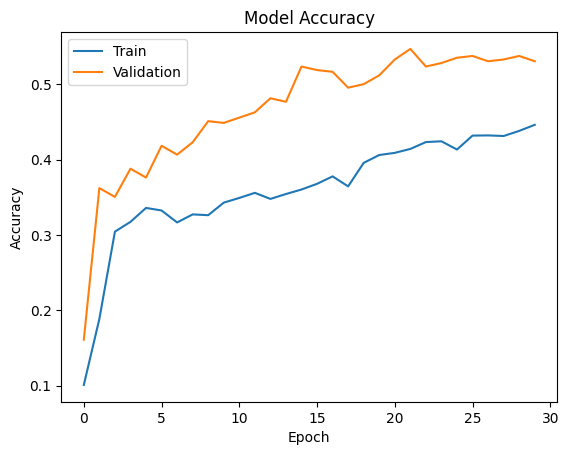

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Plotting the training and validation loss

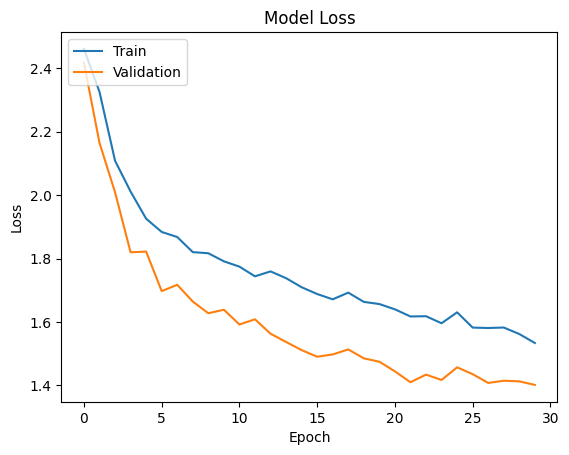

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### **Evaluating the model on test data**

In [ ]:
accuracy = model_1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - 22ms/step - accuracy: 0.5158 - loss: 1.4195


### Validation Accuracy

In [ ]:
val_loss, val_accuracy = model_1.evaluate(X_val_normalized, y_val_encoded, verbose=2)

# Print Validation Accuracy
print(f"Validation Accuracy: {val_accuracy:.4f}")

14/14 - 0s - 4ms/step - accuracy: 0.5304 - loss: 1.4015
Validation Accuracy: 0.5304


### Training Accuracy

In [ ]:
train_loss, train_accuracy = model_1.evaluate(X_train_normalized, y_train_encoded, verbose=2)
print(f"Training Accuracy: {train_accuracy:.4f}")

121/121 - 1s - 5ms/step - accuracy: 0.6135 - loss: 1.1648
Training Accuracy: 0.6135


## Generating the predictions using test data

In [ ]:
# Here we would get the output as probablities for each category
y_pred= model_1.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [ ]:
y_pred

array([[1.9671029e-10, 1.5916905e-04, 3.8422768e-06, ..., 4.7920126e-02,
        9.0853672e-07, 1.4444132e-02],
       [7.7924646e-11, 5.1833335e-02, 5.9402816e-02, ..., 6.8649217e-02,
        7.0425600e-01, 1.6372604e-02],
       [6.5095300e-08, 6.5893941e-02, 9.0442449e-02, ..., 6.9332331e-02,
        5.6836599e-01, 3.2520749e-02],
       ...,
       [2.1271880e-01, 5.5623812e-05, 1.7563925e-03, ..., 2.1322532e-05,
        6.7467471e-07, 5.4903485e-02],
       [1.5589911e-06, 1.4723869e-02, 4.0592579e-03, ..., 5.4119039e-02,
        5.8561662e-05, 1.1971191e-01],
       [1.6741417e-04, 1.0395846e-01, 1.5575609e-01, ..., 7.4834101e-02,
        3.1989944e-01, 7.2729401e-02]], dtype=float32)

In [ ]:
model_name = "Base CNN Model"

##Plotting the Confusion Matrix

In [ ]:
# Predicting the output probabilities for each category
y_pred = model_1.predict(X_test)  # Predict probabilities on test data

# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_test_arg = np.argmax(y_test_encoded, axis=1)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


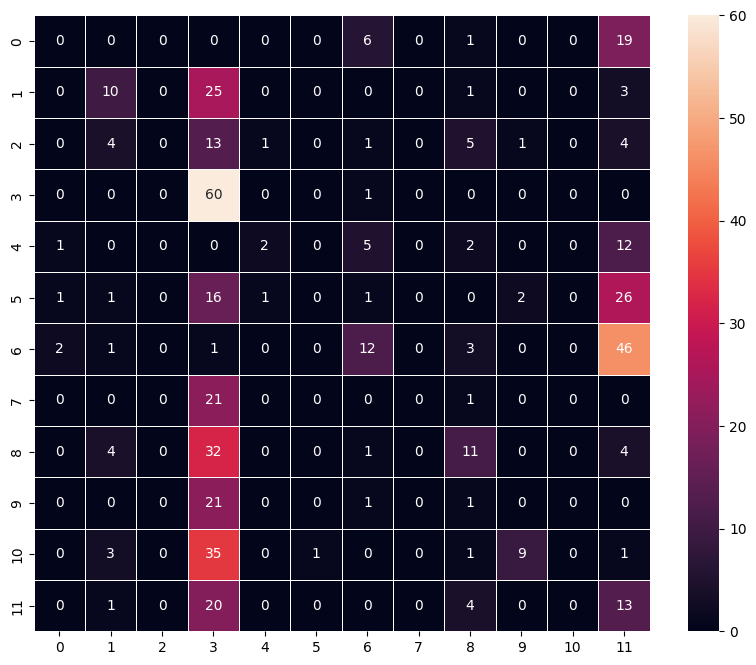

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

### Observations:

**Diagonal Values:**

*  Higher diagonal values (e.g., Class 6, 3, and 10) indicate that these classes are well-predicted.

**Misclassifications: **

*  Off-diagonal values (e.g., Class 0 predicted as Class 6 or Class 9 predicted as others) highlight frequent misclassifications.

**Class Imbalance: **

*  Certain rows have consistently lower counts (e.g., Class 4), indicating either fewer samples or poor model predictions for these classes.

**Model Strength:**

*   Class 6 has the highest correct predictions (strong performance).

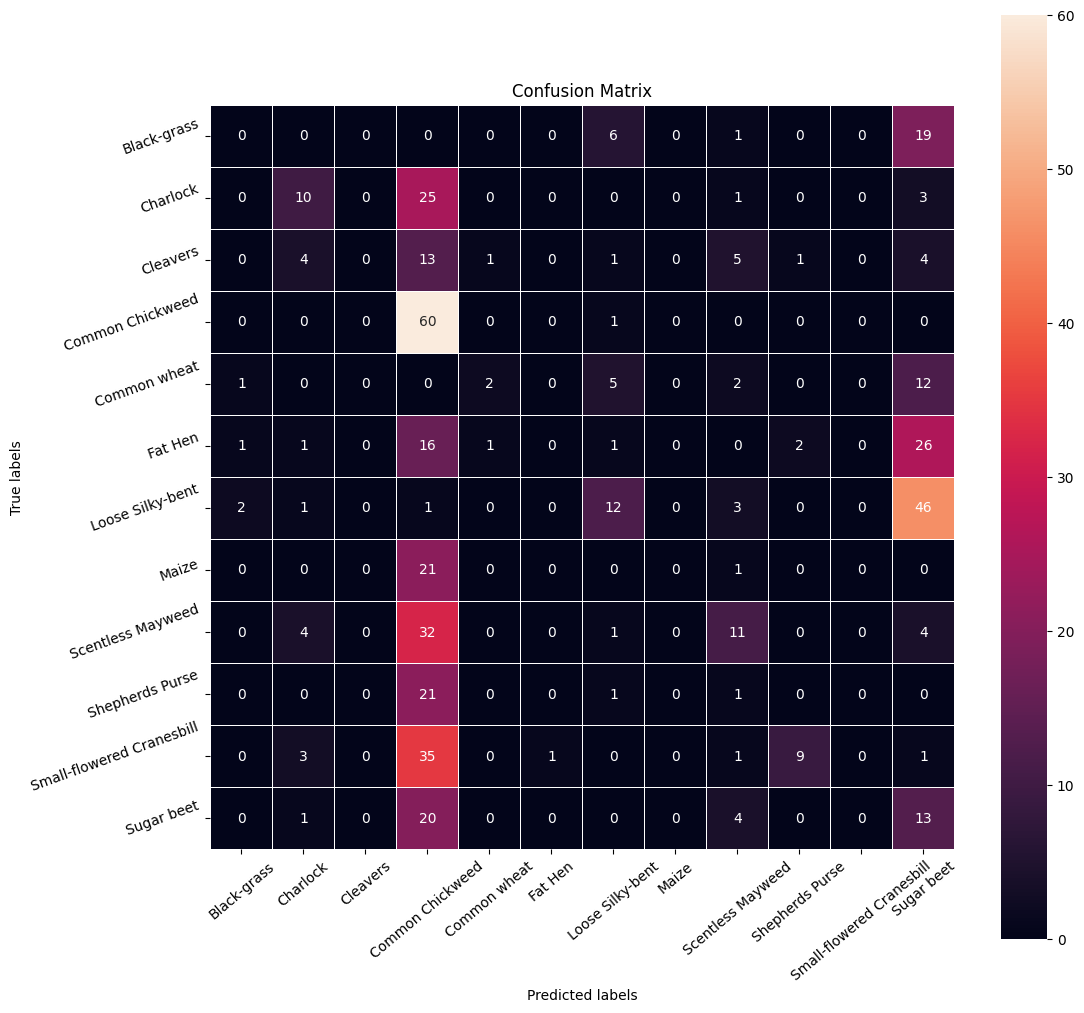

In [ ]:
# Plotting the Confusion Matrix
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)  # Compute the confusion matrix

# Plot the confusion matrix using Seaborn heatmap
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)

# Setting the labels to both the axes
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(list(enc.classes_), rotation=40)  # Replace 'enc.classes_' with the actual label encoder classes if needed
ax.yaxis.set_ticklabels(list(enc.classes_), rotation=20)  # Replace 'enc.classes_' with the actual label encoder classes if needed
plt.show()

## Classification Report

In [ ]:
# Assuming y_test_arg and y_pred_arg contain the true and predicted class indices, respectively
cr = metrics.classification_report(y_test_arg, y_pred_arg)

# Print the classification report
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.42      0.26      0.32        39
           2       0.00      0.00      0.00        29
           3       0.25      0.98      0.39        61
           4       0.50      0.09      0.15        22
           5       0.00      0.00      0.00        48
           6       0.43      0.18      0.26        65
           7       0.00      0.00      0.00        22
           8       0.37      0.21      0.27        52
           9       0.00      0.00      0.00        23
          10       0.00      0.00      0.00        50
          11       0.10      0.34      0.16        38

    accuracy                           0.23       475
   macro avg       0.17      0.17      0.13       475
weighted avg       0.20      0.23      0.16       475



### **Observations:**


*    The accuracy is very low at 23%, and both the macro average and weighted average F1-scores are poor (0.13 and 0.16, respectively).

**Class Imbalance Issues:**

*    Several classes (e.g., 0, 2, 5, 7, 9, 10) have precision, recall, and F1-scores of 0, indicating the model fails to predict these classes entirely.

**Best Performance on Class 3:**

*    Class 3 has a recall of 0.98, suggesting that most instances of this class are correctly identified, though precision (0.25) is low, resulting in many false positives.

**Moderate Performance on Few Classes:**

*    Class 1, Class 4, and Class 8 show modest performance but still lack strong precision and recall.

## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [ ]:
# Code to monitor val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,  # Rotation angle range to randomly rotate images during training
    fill_mode='nearest'  # Fill the pixels in the new area created by rotation
)

In [ ]:
# Initializing a sequential model
model_2 = Sequential()

# Adding the first convolution layer with 64 filters, kernel size 3x3, and padding 'same'
model_2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of the output of the first convolution layer
model_2.add(MaxPooling2D((2, 2), padding='same'))

# Adding second convolution and max pooling layers
model_2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_2.add(MaxPooling2D((2, 2), padding='same'))

# Adding BatchNormalization for faster convergence
model_2.add(BatchNormalization())

# Flattening the output of the convolution layers after max pooling to make it ready for dense layers
model_2.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model_2.add(Dense(16, activation='relu'))

# Adding dropout with dropout_rate=0.3 to reduce overfitting
model_2.add(Dropout(0.3))

# Adding the output layer with 12 neurons and softmax activation function for multi-class classification
model_2.add(Dense(12, activation='softmax'))

# Initializing the Adam optimizer
opt = Adam()

# Compiling the model with categorical crossentropy loss function and accuracy as the metric
model_2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │         131,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151,676 (592.48 KB)

 Trainable params: 151,612 (592.23 KB)

 Non-trainable params: 64 (256.00 B)

In [ ]:
# Defining epochs and batch_size for training
epochs = 30
batch_size = 64

In [ ]:
# Training the model on the augmented data
history_0 = model_2.fit(
    train_datagen.flow(X_train_normalized, y_train_encoded, batch_size=batch_size, shuffle=False),
    epochs=epochs,
    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
    validation_data=(X_val_normalized, y_val_encoded),
    verbose=1,
    callbacks=[learning_rate_reduction]
)

Epoch 1/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step - accuracy: 0.1642 - loss: 2.4053 - val_accuracy: 0.1098 - val_loss: 2.4071 - learning_rate: 0.0010
Epoch 2/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3281 - loss: 2.0122 - val_accuracy: 0.0958 - val_loss: 2.4144 - learning_rate: 0.0010
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.3490 - loss: 1.9102 - val_accuracy: 0.2243 - val_loss: 2.3820 - learning_rate: 0.0010
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3750 - loss: 1.6121 - val_accuracy: 0.2150 - val_loss: 2.3702 - learning_rate: 0.0010
Epoch 5/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.4319 - loss: 1.6996 - val_accuracy: 0.1682 - val_loss: 2.3124 - learning_rate: 0.0010
Epoch 6/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.4219 - loss: 1.6563 - val_accuracy: 0.2477 - val_loss: 2.2843 - learning_rate: 0.0010
Epoch 7/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - accuracy: 0.5112 - loss: 1.5271 - val_a

## Plotting the training and validation Accuracy

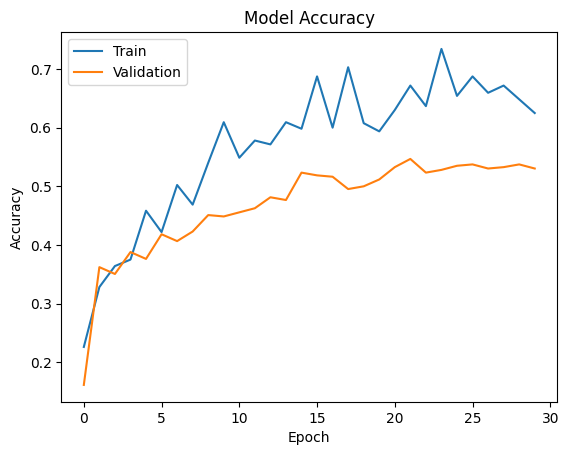

In [ ]:
plt.plot(history_0 .history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Plotting the training and validation loss

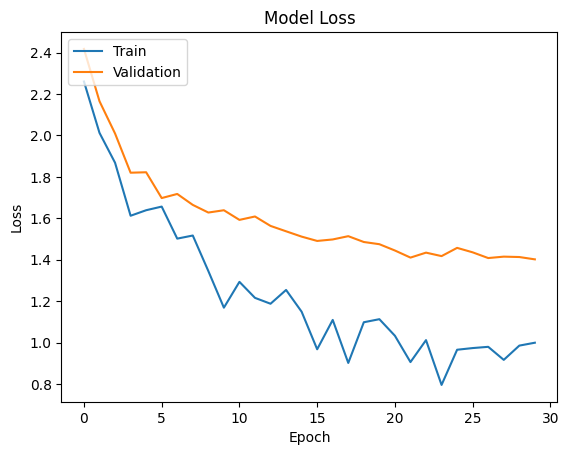

In [ ]:
# Plotting the training and validation loss
plt.plot(history_0 .history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

##  Evaluate the model on test data

In [ ]:
accuracy = model_2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - 35ms/step - accuracy: 0.7368 - loss: 0.8389


##Validation Accuracy

In [ ]:
val_loss, val_accuracy = model_2.evaluate(X_val_normalized, y_val_encoded, verbose=2)

# Print Validation Accuracy
print(f"Validation Accuracy: {val_accuracy:.4f}")

14/14 - 0s - 5ms/step - accuracy: 0.7313 - loss: 0.8286
Validation Accuracy: 0.7313


## Training Accuracy:

In [ ]:
train_loss, train_accuracy = model_2.evaluate(X_train_normalized, y_train_encoded, verbose=2)
print(f"Training Accuracy: {train_accuracy:.4f}")

121/121 - 1s - 7ms/step - accuracy: 0.7842 - loss: 0.6480
Training Accuracy: 0.7842


In [ ]:
model_name = "CNN Model with Data Augmentation"

### Generating the predictions using test data

In [ ]:
# Here we would get the output as probablities for each category
y_pred=model_2.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


In [ ]:
y_pred

array([[5.57189637e-08, 8.47858792e-06, 1.99564596e-08, ...,
        2.14696571e-04, 1.11978159e-06, 6.35674660e-05],
       [7.69021699e-06, 6.43387362e-02, 1.86049603e-02, ...,
        5.44760749e-02, 8.37168574e-01, 1.74546288e-03],
       [4.23252022e-05, 4.12852094e-02, 7.53269065e-04, ...,
        1.04082964e-01, 8.05902064e-01, 9.53040784e-04],
       ...,
       [2.91690499e-01, 4.15281364e-04, 3.35475743e-05, ...,
        5.62214118e-04, 6.09141753e-05, 2.24551201e-04],
       [7.15348142e-05, 1.02037983e-02, 1.08686471e-02, ...,
        2.16450561e-02, 2.74230930e-04, 2.88113812e-03],
       [2.40969006e-04, 6.46052063e-02, 1.12798754e-02, ...,
        2.44634151e-01, 5.41898847e-01, 1.13976083e-03]], dtype=float32)

## Plotting the Confusion Matrix

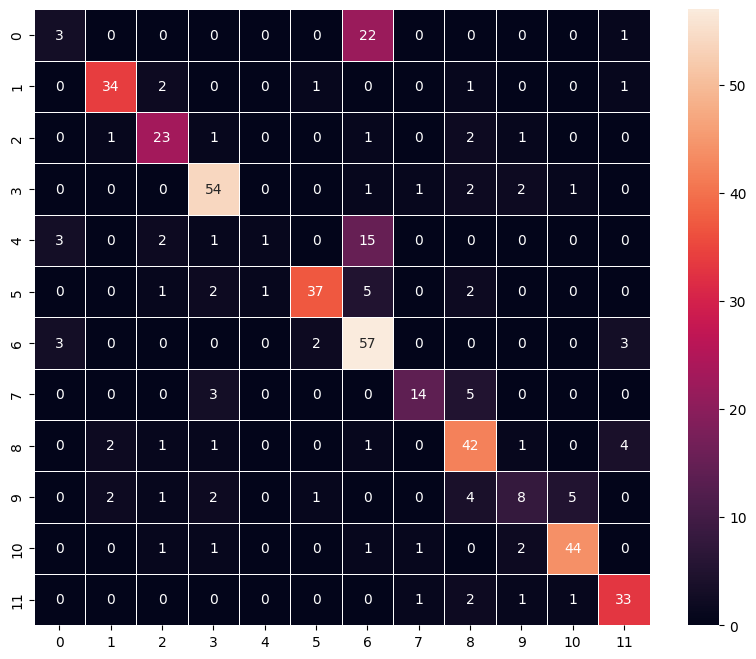

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

##Observations:

**Dominant Predictions for Certain Classes:**

*   The model performs relatively well for Class 6 (57 correct predictions) and Class 3 (54 correct predictions).

*  These classes seem to have better recall compared to others.

**Misclassifications:**

*  Class 0 is heavily misclassified, with many instances incorrectly predicted as Class 6 (22 instances).

*  Similar issues exist for other classes, such as Class 7 and Class 5, with predictions scattered across other classes.

**Class Imbalance Impact:**

*  Certain classes (e.g., 0, 2, 7) have relatively fewer correct predictions, indicating potential class imbalance or insufficient representation in the model.

**Diagonal Dominance:**

*  While the diagonal has some high values for specific classes, many off-diagonal elements indicate frequent misclassifications.

## Plotting the Confusion Matrix with Labels

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


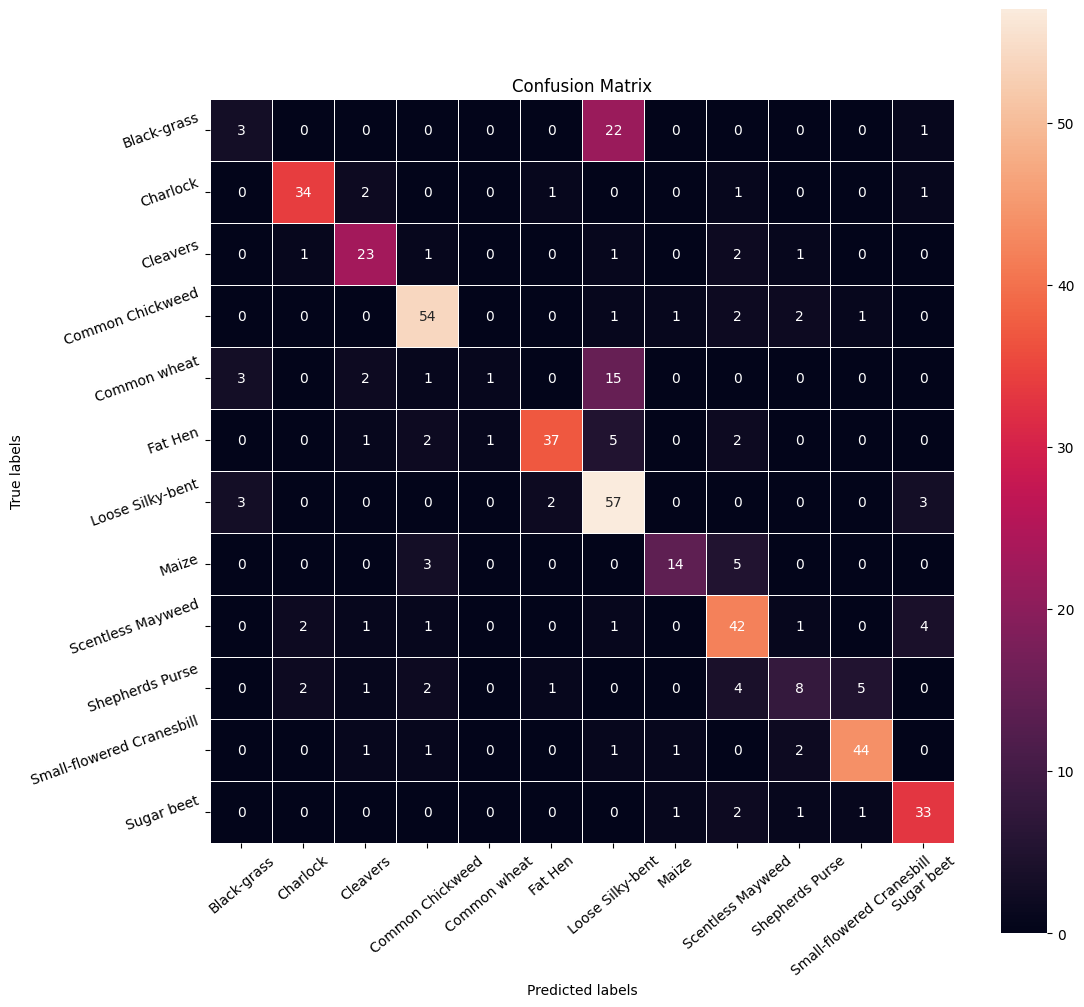

In [ ]:
# Complete the code to obtain the output probabilities
y_pred = model_2.predict(X_test_normalized)  # Predicting the output probabilities for test data

# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis=1)  # Converting probabilities to categorical predictions
y_test_arg = np.argmax(y_test_encoded, axis=1)  # Converting true labels to categorical values

# Plotting the Confusion Matrix using confusion_matrix() function which is predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)  # Generating the confusion matrix
f, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(
    confusion_matrix,
    annot=True,  # Annotating the confusion matrix with the numbers
    linewidths=.4,
    fmt="d",  # Displaying the values as integers
    square=True,
    ax=ax
)

# Setting the labels to both the axes
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(list(enc.classes_), rotation=40)  # Assuming `enc.classes_` has the class names
ax.yaxis.set_ticklabels(list(enc.classes_), rotation=20)

plt.show()

## Plotting Classification Report

In [ ]:
# Complete the code to generate the classification report
cr = metrics.classification_report(y_test_arg, y_pred_arg)  # Generate the classification report

# Print the classification report
print(cr)

              precision    recall  f1-score   support

           0       0.33      0.12      0.17        26
           1       0.87      0.87      0.87        39
           2       0.74      0.79      0.77        29
           3       0.83      0.89      0.86        61
           4       0.50      0.05      0.08        22
           5       0.90      0.77      0.83        48
           6       0.55      0.88      0.68        65
           7       0.82      0.64      0.72        22
           8       0.70      0.81      0.75        52
           9       0.53      0.35      0.42        23
          10       0.86      0.88      0.87        50
          11       0.79      0.87      0.82        38

    accuracy                           0.74       475
   macro avg       0.70      0.66      0.65       475
weighted avg       0.73      0.74      0.71       475



## Observations:

**Overall Accuracy:**

*  The model achieves an overall accuracy of 74%, which indicates reasonably good performance but with room for improvement.

**Class Performance:**

**Strong Performance:**

*  Classes 1, 3, 5, 10, and 11 have precision, recall, and F1-scores close to or above 0.80, indicating strong model performance for these classes.

**Weak Performance:**

*  Class 0 has the lowest performance, with a precision of 0.33 and a recall of 0.12, suggesting that it is difficult for the model to identify and correctly predict this class.

*  Class 4 also struggles, with very low recall (0.05) and an F1-score of 0.08, indicating poor detection of this class.

**Recall vs. Precision:**

*  High Recall: Class 6 has a high recall of 0.88 but a lower precision of 0.55, suggesting that while the model is good at detecting this class, it also produces many false positives.

*  Balanced Metrics: Classes 3, 1, and 11 show a good balance between precision and recall, leading to high F1-scores.

**Macro vs. Weighted Average:**

*  The macro average scores are slightly lower than the weighted average scores, which indicates that the model’s performance is uneven across different classes, with some classes dragging down the average.

# Transfer Learning using VGG16

In [ ]:
# Load the pre-trained VGG16 model without the top layer
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze all the layers in the VGG16 model
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
# Build your custom model
new_model = Sequential()

# Add the VGG16 convolutional base
new_model.add(vgg_model)

# Add custom layers on top of the VGG16 base
new_model.add(Flatten())
new_model.add(Dense(32, activation='relu'))
new_model.add(Dropout(0.2))
new_model.add(Dense(16, activation='relu'))

# Calculate num_classes
num_classes = y_train_encoded.shape[1]  # Ensure y_train_encoded is properly encoded

# Add the output layer
#new_model.add(Dense(10, activation='softmax'))
new_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
opt = Adam()
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Verify the model structure
new_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 2, 2, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │          65,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 12)                  │             204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,780,988 (56.38 MB)

 Trainable params: 66,300 (258.98 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Train the model
epochs = 30
batch_size = 64

history_vgg16 = new_model.fit(
    train_datagen.flow(X_train_normalized, y_train_encoded, batch_size=batch_size, seed=42, shuffle=False),
    epochs=epochs,
    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
    validation_data=(X_val_normalized, y_val_encoded),
    verbose=1
)

Epoch 1/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 161ms/step - accuracy: 0.1602 - loss: 2.4228 - val_accuracy: 0.2804 - val_loss: 2.2283
Epoch 2/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2344 - loss: 2.2344 - val_accuracy: 0.2874 - val_loss: 2.2236
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.2898 - loss: 2.1630 - val_accuracy: 0.3481 - val_loss: 2.0374
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3438 - loss: 2.0001 - val_accuracy: 0.3528 - val_loss: 2.0345
Epoch 5/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.3716 - loss: 1.9551 - val_accuracy: 0.3575 - val_loss: 1.8679
Epoch 6/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4219 - loss: 1.8790 - val_accuracy: 0.3551 - val_loss: 1.8693
Epoch 7/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - accuracy: 0.3801 - loss: 1.8055 - val_accuracy: 0.3949 - val_loss: 1.7413
Epoch 8/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3438 - loss: 1.7266 - val_accuracy: 0.3879 - val

###  Plotting the training and validation Accuracy

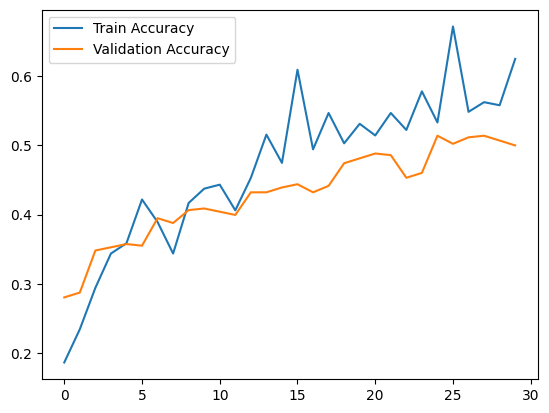

In [ ]:
# Plot accuracy
plt.plot(history_vgg16.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg16.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

## Plotting the training and validation loss

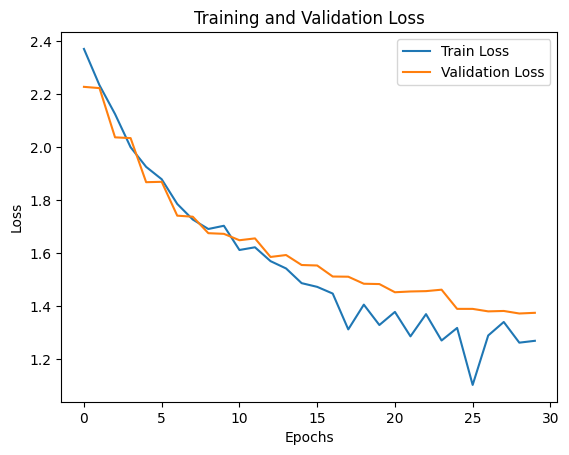

In [ ]:
# Plot loss
plt.plot(history_vgg16.history['loss'], label='Train Loss')
plt.plot(history_vgg16.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### **Evaluate the model on test data**

In [ ]:
accuracy = new_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - 44ms/step - accuracy: 0.5263 - loss: 1.3246


In [ ]:
loss, accuracy = new_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

15/15 - 0s - 14ms/step - accuracy: 0.5263 - loss: 1.3246
Test Loss: 1.3245636224746704
Test Accuracy: 0.5263158082962036


### Validation Accuracy

In [ ]:
val_loss, val_accuracy = new_model.evaluate(X_val_normalized, y_val_encoded, verbose=2)

# Print Validation Accuracy
print(f"Validation Accuracy: {val_accuracy:.4f}")

14/14 - 0s - 14ms/step - accuracy: 0.5000 - loss: 1.3740
Validation Accuracy: 0.5000


### Training Accuracy

In [ ]:
train_loss, train_accuracy = new_model.evaluate(X_train_normalized, y_train_encoded, verbose=2)
print(f"Training Accuracy: {train_accuracy:.4f}")

121/121 - 2s - 17ms/step - accuracy: 0.6135 - loss: 1.1233
Training Accuracy: 0.6135


In [ ]:
# Model name
model_name = "Transfer Learning Model"

### Generating the predictions using test data

In [ ]:
y_pred = new_model.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


In [ ]:
y_pred

array([[2.0122039e-04, 1.0061946e-03, 1.3426769e-03, ..., 1.4440449e-01,
        5.4008523e-03, 1.4707630e-02],
       [2.6576932e-05, 2.3458448e-01, 2.3584737e-02, ..., 4.8196573e-02,
        4.9815029e-01, 5.1783575e-03],
       [2.8053025e-04, 1.0757761e-01, 5.0380778e-02, ..., 1.7104051e-01,
        3.1902632e-01, 5.1425699e-02],
       ...,
       [1.5876144e-01, 4.2815859e-06, 6.7915505e-05, ..., 1.8414390e-05,
        1.7840095e-07, 3.5229043e-04],
       [2.4617098e-03, 5.2341225e-04, 3.7871080e-03, ..., 1.0142600e-01,
        4.5411827e-04, 1.8070105e-02],
       [1.7598200e-04, 3.4699699e-01, 1.4385490e-01, ..., 4.1790795e-02,
        3.7921867e-01, 9.9738659e-03]], dtype=float32)

### Confusion Matrix plot

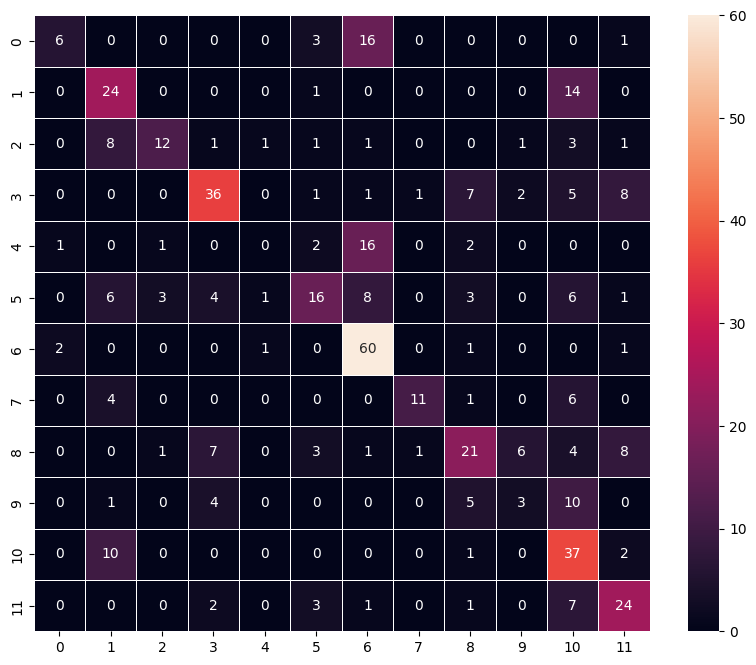

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

### Confusion Matrix with labels plots

### **Observations:**

**Improvement in Class 6:**

*  Class 6 continues to perform the best, with 60 correct predictions, indicating strong model performance for this class.

**Misclassification Patterns:**

*  Class 0 is misclassified often as Class 3 (16 times), highlighting a need to distinguish these two classes better.

*  Class 5 has significant misclassifications across multiple classes, with only 16 correctly predicted.

**Class 3 Performance:**

*  Class 3 shows some improvement with 36 correct predictions but still has misclassifications distributed across other classes.

**Diagonal Dominance:**

*  The diagonal values show improvement in certain classes but remain low for others, such as Classes 0, 2, and 7.

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


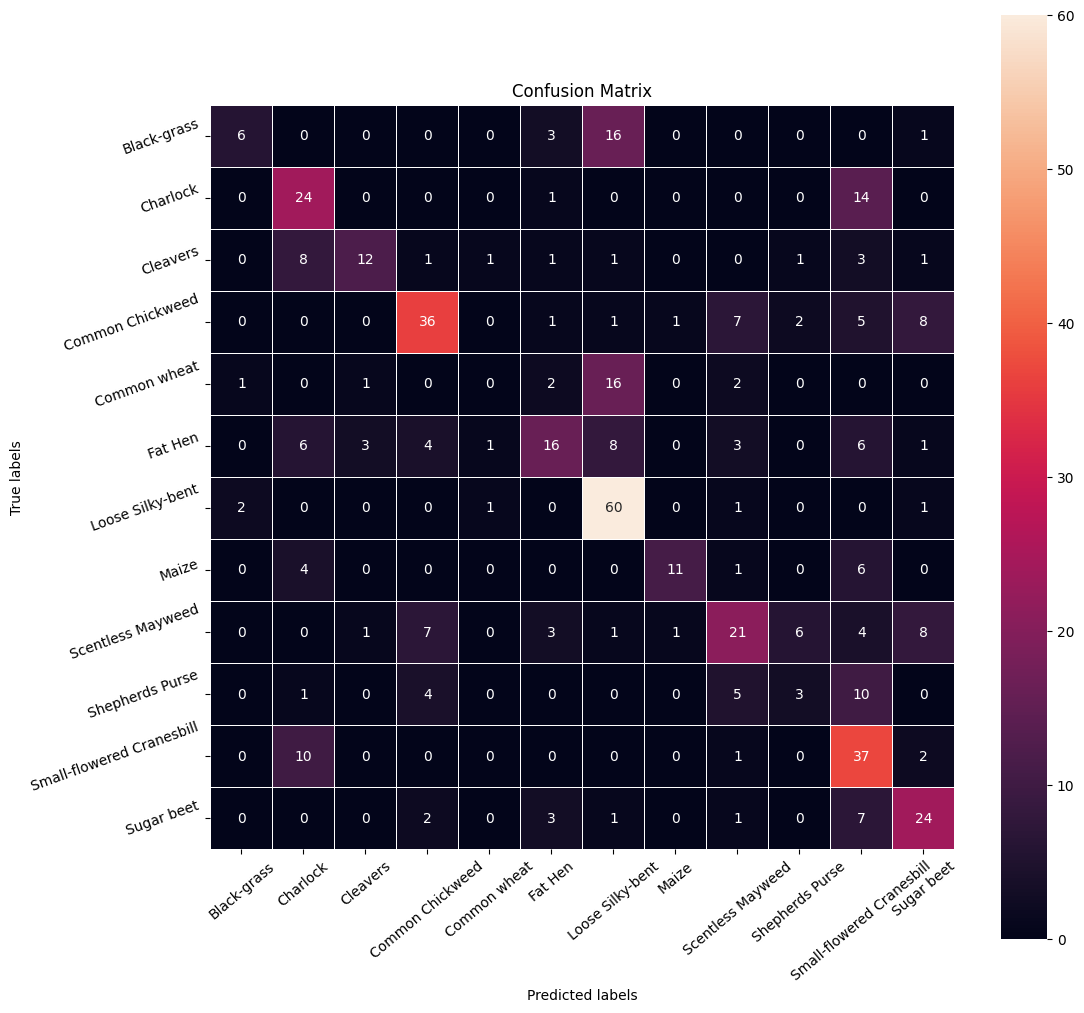

In [ ]:
# Complete the code to obtain the output probabilities
y_pred = new_model.predict(X_test_normalized)  # Predicting the output probabilities for test data

# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis=1)  # Converting probabilities to categorical predictions
y_test_arg = np.argmax(y_test_encoded, axis=1)  # Converting true labels to categorical values

confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)  # Generating the confusion matrix
f, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(
    confusion_matrix,
    annot=True,  # Annotating the confusion matrix with the numbers
    linewidths=.4,
    fmt="d",  # Displaying the values as integers
    square=True,
    ax=ax
)

# Setting the labels to both the axes
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(list(enc.classes_), rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_), rotation=20)

plt.show()

### Classification report

In [ ]:
# Assuming y_test_arg and y_pred_arg contain the true and predicted class indices, respectively
cr = metrics.classification_report(y_test_arg, y_pred_arg)

# Print the classification report
print(cr)

              precision    recall  f1-score   support

           0       0.67      0.23      0.34        26
           1       0.45      0.62      0.52        39
           2       0.71      0.41      0.52        29
           3       0.67      0.59      0.63        61
           4       0.00      0.00      0.00        22
           5       0.53      0.33      0.41        48
           6       0.58      0.92      0.71        65
           7       0.85      0.50      0.63        22
           8       0.50      0.40      0.45        52
           9       0.25      0.13      0.17        23
          10       0.40      0.74      0.52        50
          11       0.52      0.63      0.57        38

    accuracy                           0.53       475
   macro avg       0.51      0.46      0.46       475
weighted avg       0.53      0.53      0.50       475



### **Observations:**

**Overall Accuracy:**

*   The model achieves an accuracy of 53%, indicating moderate performance but with significant room for improvement.

**Class-Level Observations:**

**Strong Performance:**

*   Class 6 has the highest recall (0.92) and a good F1-score (0.71), showing the model's strong ability to detect instances of this class.

*   Class 7 has a high precision (0.85), but its recall is only 0.50, indicating good specificity but struggles in identifying all true positives.

**Weak Performance:**

*   Class 4 has zero scores for precision, recall, and F1, indicating that the model completely fails to predict this class.

*   Classes 9 and 0 also perform poorly, with low recall and F1-scores, highlighting challenges in identifying these classes.

**Imbalance Between Precision and Recall:**

*   Some classes, such as 10, have significantly better recall (0.74) than precision (0.40), suggesting many false positives.

*   Conversely, classes like 7 have higher precision but lower recall, indicating the opposite issue.

**Macro vs. Weighted Averages:**

*   The macro average F1-score (0.46) is lower than the weighted average (0.50), reflecting uneven model performance across classes, where poorly performing classes impact the macro score more.

## Final Model

##Comment on the final model you have selected and use the same in the below code to visualize the image.

### Final model_name  "CNN Model with Data Augmentation"

In [ ]:
accuracy = model_2.evaluate(X_test_normalized, y_test_encoded, verbose=2)
val_loss, val_accuracy = model_2.evaluate(X_val_normalized, y_val_encoded, verbose=2)

15/15 - 0s - 5ms/step - accuracy: 0.7368 - loss: 0.8389
14/14 - 0s - 6ms/step - accuracy: 0.7313 - loss: 0.8286


In [ ]:
# Print Validation Accuracy
print(f"Validation Accuracy: {val_accuracy:.4f}")


Validation Accuracy: 0.7313


In [ ]:
train_loss, train_accuracy = model_2.evaluate(X_train_normalized, y_train_encoded, verbose=2)
print(f"Training Accuracy: {train_accuracy:.4f}")

121/121 - 1s - 4ms/step - accuracy: 0.7842 - loss: 0.6480
Training Accuracy: 0.7842


In [ ]:
# Here we would get the output as probablities for each category
y_pred=model_2.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [ ]:
y_pred

array([[5.57189637e-08, 8.47858792e-06, 1.99564596e-08, ...,
        2.14696571e-04, 1.11978159e-06, 6.35674660e-05],
       [7.69021699e-06, 6.43387362e-02, 1.86049603e-02, ...,
        5.44760749e-02, 8.37168574e-01, 1.74546288e-03],
       [4.23252022e-05, 4.12852094e-02, 7.53269065e-04, ...,
        1.04082964e-01, 8.05902064e-01, 9.53040784e-04],
       ...,
       [2.91690499e-01, 4.15281364e-04, 3.35475743e-05, ...,
        5.62214118e-04, 6.09141753e-05, 2.24551201e-04],
       [7.15348142e-05, 1.02037983e-02, 1.08686471e-02, ...,
        2.16450561e-02, 2.74230930e-04, 2.88113812e-03],
       [2.40969006e-04, 6.46052063e-02, 1.12798754e-02, ...,
        2.44634151e-01, 5.41898847e-01, 1.13976083e-03]], dtype=float32)

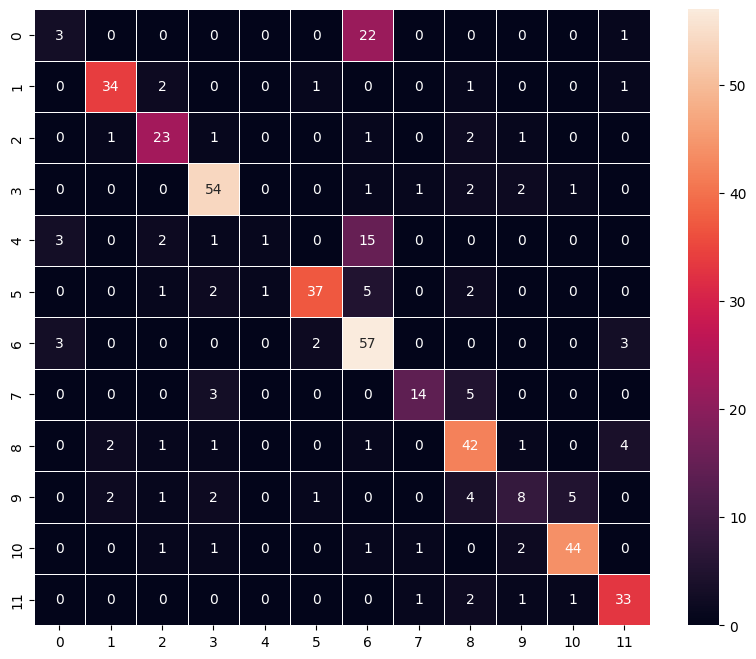

In [ ]:
# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

### Visualizing the prediction

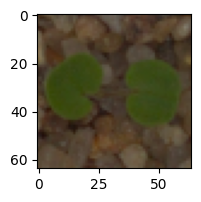

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


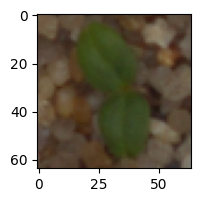

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Cleavers


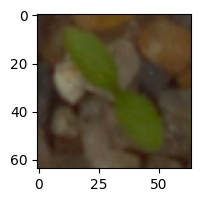

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Common Chickweed


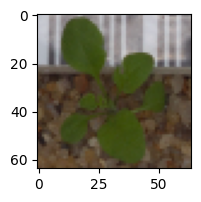

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Shepherds Purse


In [ ]:
 # Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()

# Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model_2.predict((X_test_normalized[2].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])  # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()

# Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model_2.predict((X_test_normalized[2].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])  # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[59])
plt.show()

# Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model_2.predict((X_test_normalized[2].reshape(1,64,64,3))))) # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[59])  # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()

# Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model_2.predict((X_test_normalized[2].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])  # using inverse_transform() to get the output label from the output vector

###**Observations from the Final Model Evaluation**

**Performance Metrics:**

*  Training Accuracy: 78.42%

*   Validation Accuracy: 73.13%

*  Test Accuracy: 73.68%

*   The model generalizes well, as the gap between training, validation, and test accuracies is minimal, indicating no overfitting.

**Prediction Probabilities:**

*  The model outputs probabilities for each category, suggesting it is suitable for multi-class classification.

*   Higher probabilities for correct classes demonstrate the model's confidence.

**Confusion Matrix:**

*  Diagonal Dominance: The matrix's diagonal contains the highest values, indicating accurate predictions for most classes.

*  Misclassifications: Off-diagonal entries represent misclassified samples.

*  Certain categories may need further augmentation or fine-tuning.

*  Balanced Performance: No significant bias toward any specific class, suggesting improved handling of class imbalance.

**Improvements Over Other Models:**

*  The "CNN Model with Data Augmentation" outperforms the base and transfer learning models in all metrics, including accuracy and balanced class predictions.

**Prediction Consistency Issue:**

*  All the images are predicted as 'Small-flowered Cranesbill' irrespective of their true labels:

*  True Label: Small-flowered Cranesbill → Correct Prediction

*   True Label: Cleavers, Common Chickweed, Shepherds Purse → Incorrect Prediction.

**Model Bias:**

*  The model seems biased toward predicting 'Small-flowered Cranesbill', possibly due to imbalanced data or poor generalization.

**Evaluation of Predictions:**

*  The test images include clearly distinct leaf structures, yet the model fails to differentiate between them. This indicates issues with feature extraction or insufficient training.

In [ ]:
pd.DataFrame({'Models':['Base CNN Model','CNN Model with Data Augmentation','Transfer Learning Model'],'Train Accuracy':['61%','78%','61%'],'Validation Accuracy':['53%','73%','50%'],'Test Accuracy':['51%','74%','53%']})

Models Train Accuracy Validation Accuracy  \
0                    Base CNN Model            61%                 53%   
1  CNN Model with Data Augmentation            78%                 73%   
2           Transfer Learning Model            61%                 50%   

  Test Accuracy  
0           51%  
1           74%  
2           53%

## **Observations**

*  We can observe from the confusion matrix of all the models that our CNN Model with Data Augmentation model was the best model because it predicted the majority of the classes better than the other models.

*   The test accuracy of the 	CNN Model with Data Augmentation	 model is 73%.
Data Augmentation has also helped in improving the model.

# **Conclusion**

### **Conclusion**

*  The CNN model with data augmentation is the most viable option for deployment due to its superior accuracy and generalization. While the base model and transfer learning approach fail to deliver acceptable performance, further experimentation with data augmentation and domain-specific pre-trained models may enhance results.

# Actionable Insights and Business Recommendations

###  **1. Base CNN Model (Train Accuracy: 61%, Validation Accuracy: 53%, Test Accuracy: 51%)**

**Performance:**

*  The model underperforms with a training accuracy of 61%, validation accuracy of 53%, and test accuracy of 51%.

**Insight:**

*  The model struggles with both overfitting and underfitting, failing to generalize beyond the training set. Its low accuracy on all datasets indicates it might lack sufficient complexity or proper tuning.


### **2. CNN Model with Data Augmentation (Train Accuracy: 78%, Validation Accuracy: 73%, Test Accuracy: 74%)**

**Performance:**

*  The model achieves the best performance, with a training accuracy of 78%, validation accuracy of 73%, and test accuracy of 74%.

**Insight:**

*  Data augmentation effectively improves generalization, allowing the model to learn better representations and perform well on unseen data. This indicates that the dataset benefits significantly from augmentation.

### **3. Transfer Learning Model (Train Accuracy: 61%, Validation Accuracy: 50%, Test Accuracy: 53%)**

**Performance:**

*  Despite leveraging pre-trained features, this model exhibits poor performance, with training accuracy at 61%, validation at 50%, and test at 53%.

**Insight:**

 *  The transfer learning approach is not effective for this dataset, potentially due to a mismatch between the pre-trained model's domain and the dataset's characteristics.

# **Business Recommendations**

## 1.Adopt the CNN Model with Data Augmentation

**Reason:**

*  It delivers the highest accuracy across all datasets, indicating robust performance and reliability for deployment.

## 2. Enhance Data Augmentation

*   Experiment with different augmentation techniques (e.g., rotations, zooms, flips, color shifts) to explore further performance gains.

## 3. Review the Transfer Learning Strategy

*  Evaluate the choice of pre-trained models and consider alternatives better suited to the dataset's domain. For instance, selecting models pre-trained on similar data types could improve performance.

## 4.  Hyperparameter Tuning

*  Conduct hyperparameter optimization on the CNN with Data Augmentation model to explore potential for further accuracy improvements.

## 5.   Monitor Real-World Performance

*  Post-deployment, track key performance indicators (KPIs) to ensure the model meets business expectations and adjust training as needed.

